In [1]:
from sympy import *
import numpy as np
import scipy.interpolate as scinter
import matplotlib.pyplot as plt

# zadanie 1


In [2]:
x = Symbol('x')

f = 1/ (1 + 25 * x ** 2)

f

1/(25*x**2 + 1)

In [3]:
der5 = f.diff(x, 5)
der10 = f.diff(x, 10)
der15 = f.diff(x, 15)

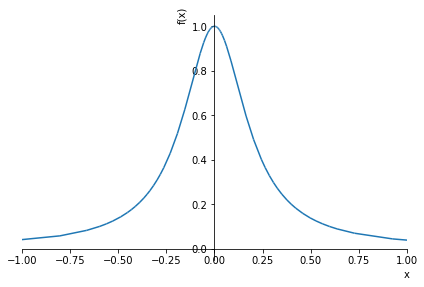

In [4]:
p0 = plot(f, xlim = (-1,1))

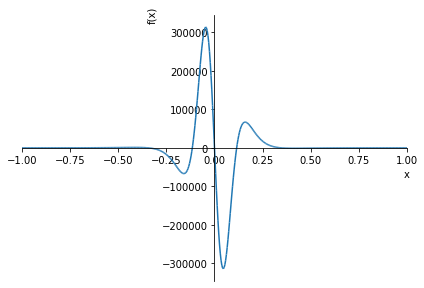

In [5]:
p5 = plot(der5, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

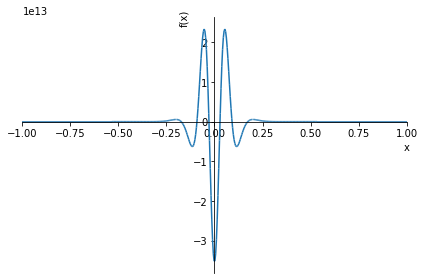

In [6]:
p10 = plot(der10, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

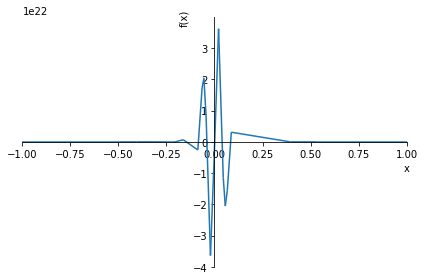

In [7]:
p15 = plot(der15, xlim = (-1,1))

In [8]:
def get_Chebyshev_nodes(n):
    points = np.zeros(n)
    for i in range(n):
        points[i] = cos((2*i + 1)/(2*(n+0)) * pi) ### ????? czemu zamiast 2(n+1) powinno byc 2(n)

    return points

In [68]:
def Newton_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n)
    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def Chebyshev_node_interpolation(f, n):
    lf = lambdify(x, f)

    points = get_Chebyshev_nodes(n)

    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def clamped_cubic_spline_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n, dtype= float)

    f_interpolated = scinter.CubicSpline(points, lf(points))

    return f_interpolated, points


def plot_interpolation(f, f_interpolated, points, a = -1, b = 1):
    lf = lambdify(x, f)
    d = np.linspace(a, b, num = 1000)

    plt.plot(d, f_interpolated(d))
    plt.plot(d, lf(d))
    plt.scatter(points, f_interpolated(points))
    plt.show()

In [10]:
def error_func(f, interpolated):
    lf = lambdify(x, f)
    return lambda p : abs(lf(p) - interpolated(p))

def plot_error_func(error_func):
    d = np.linspace(-1, 1, num = 1000)

    plt.plot(d, error_func(d))
    plt.show()

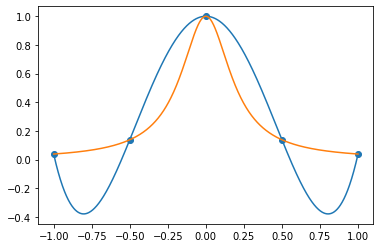

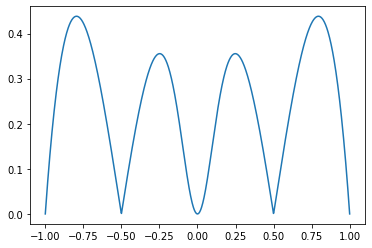

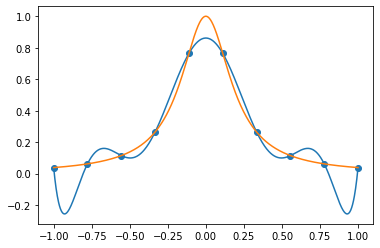

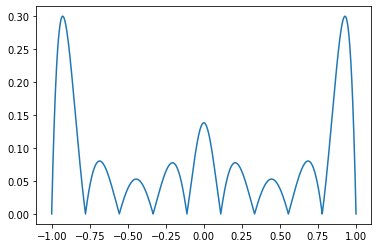

In [11]:
polyNewton5, points5 = Newton_interpolation(f, 5)
plot_interpolation(f, polyNewton5, points5)
plot_error_func(error_func(f,polyNewton5))

polyNewton10, points10 = Newton_interpolation(f, 10)
plot_interpolation(f, polyNewton10, points10)
plot_error_func(error_func(f,polyNewton10))

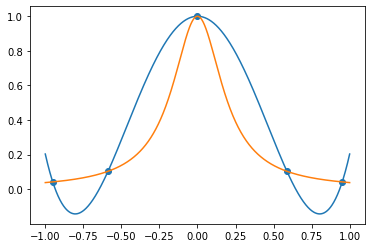

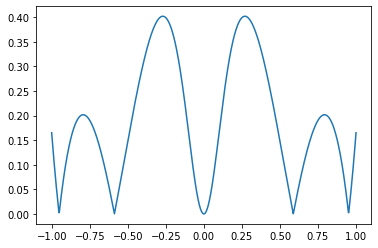

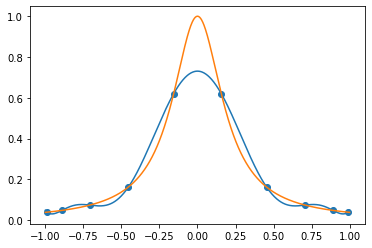

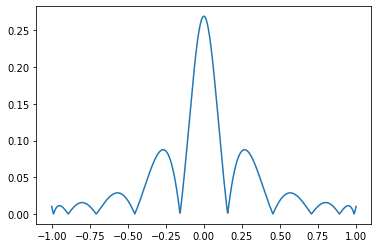

In [12]:
polyChebyshev5, points5 = Chebyshev_node_interpolation(f, 5)
plot_interpolation(f, polyChebyshev5, points5)
plot_error_func(error_func(f,polyChebyshev5))

polyChebyshev10, points10 = Chebyshev_node_interpolation(f, 10)
plot_interpolation(f, polyChebyshev10, points10)
plot_error_func(error_func(f,polyChebyshev10))

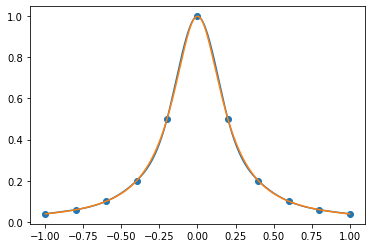

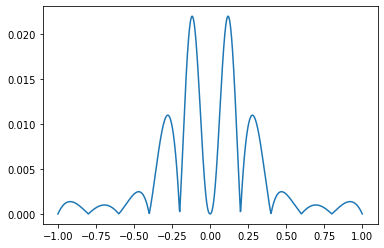

In [13]:
spline, points5 = clamped_cubic_spline_interpolation(f, 11)
plot_interpolation(f, spline, points5)
plot_error_func(error_func(f,spline))




In [25]:
from random import uniform

test_points = [uniform(-1,1) for _ in range(50)]
test_points.sort()
lf = lambdify(x, f)

Newton_errors = error_func(f, polyNewton10)
Chebyshev_errors = error_func(f, polyChebyshev10)
spline_errors = error_func(f, spline)

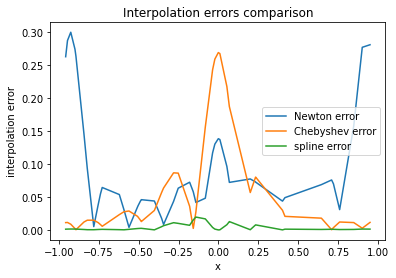

In [26]:
import pandas as pd

df = pd.DataFrame(columns=['x', 'f(x)', 'Newton', 'Chebyshev', 'spline', "Newton error", 'Chebyshev error', 'spline error'])

for i in range(len(test_points)):
    point = test_points[i]

    df.loc[i] = [point, lf(point), polyNewton10(point), polyChebyshev10(point), spline(point),
                 Newton_errors(point), Chebyshev_errors(point), spline_errors(point)]


ax = df.sort_values('x').plot(x = 'x', y = ['Newton error', 'Chebyshev error', 'spline error'])
ax.set_ylabel('interpolation error')
ax.set_title('Interpolation errors comparison')
plt.show()

In [27]:
df

,x,f(x),Newton,Chebyshev,spline,Newton error,Chebyshev error,spline error
0,-0.956451,0.041894,-0.2209800367966648,0.030798057599748286,0.043008806014900036,0.262874,0.011096,0.001115
1,-0.945018,0.042870,-0.24453727293519636,0.03153758162738264,0.044121427277413194,0.287407,0.011332,0.001252
2,-0.924509,0.044707,-0.2553026256576645,0.03605826458918522,0.04607075719018952,0.300009,0.008649,0.001364
3,-0.898251,0.047234,-0.227025962973858,0.04518083821309894,0.04853536931536298,0.274260,0.002053,0.001302
4,-0.892077,0.047858,-0.21565453142299837,0.04755397908404655,0.049118039993956905,0.263513,0.000304,0.001260
5,-0.841874,0.053422,-0.09199341515718505,0.06542952586685809,0.05408151427000156,0.145416,0.012007,0.000659
6,-0.821362,0.055973,-0.03775953712292459,0.07069814410793207,0.05631188343980255,0.093732,0.014726,0.000339
7,-0.780567,0.061606,0.05654899654856498,0.07639826670180687,0.061313413813153764,0.005057,0.014792,0.000293
8,-0.753018,0.065894,0.10409536470796443,0.0769416423234584,0.0652467497765413,0.038201,0.011048,0.000647
9,-0.738810,0.068278,0.12278014910304502,0.07642160969081874,0.06748844485075835,0.054502,0.008144,0.000790


In [37]:
def upper_bound_Newton(f, n):
    h = 2/n
    df = abs(f.diff(x, n + 1))
    df *= h ** (n+1) / (4*(n+1))
    return df

def upper_bound_Chebyshev(f, n):
    df = abs(f.diff(x, n+1))

    difference = get_Chebyshev_nodes(n)[0] - get_Chebyshev_nodes(n)[-1]

    df *= 2/factorial(n + 1) * (difference/4)**4

    return df

def upper_bound_spline(f, n):
    df  = abs(f.diff(x, 4))
    h = 2/n # roznica to h, poniewaz punkty sa rownomiernie

    df *= 5/384 * h ** 4

    max_value = 0
    return df

In [53]:
def calculate_upper_bound_evenly(function, n):
    lfunction = lambdify(x, function)
    points = np.linspace(-1, 1, num= n, dtype= float)
    return max(lfunction(points))

def calculate_upper_bound_Chebyshev(function, n):
    lfunction = lambdify(x, function)
    points = get_Chebyshev_nodes(n)

    return max(lfunction(points))

def get_max_function(f):
    points = np.linspace(-1, 1, num= 10000, dtype= float)
    lf = lambdify(x, f)
    return max(lf(points))

In [46]:
upper_bound_Newton_func = upper_bound_Newton(f, 10)
upper_bound_Chebyshev_func = upper_bound_Chebyshev(f, 10)
upper_bound_spline_func = upper_bound_spline(f, 5)



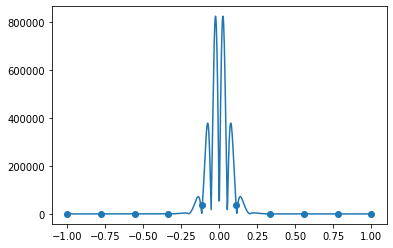

In [47]:
lff = lambdify(x, upper_bound_Newton_func)
plt.plot(np.linspace(-1, 1, num= 1000), lff(np.linspace(-1, 1, num= 1000)))

plt.scatter(np.linspace(-1, 1, num= 10, dtype= float), lff(np.linspace(-1, 1, num= 10, dtype= float)))
plt.show()

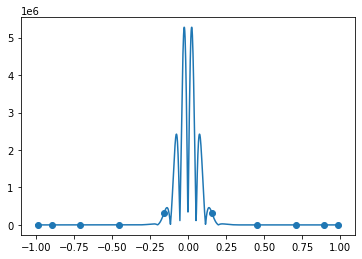

In [48]:
lff = lambdify(x, upper_bound_Chebyshev_func)
plt.plot(np.linspace(-1, 1, num= 1000), lff(np.linspace(-1, 1, num= 1000)))

plt.scatter(get_Chebyshev_nodes(10), lff(get_Chebyshev_nodes(10)))
plt.show()

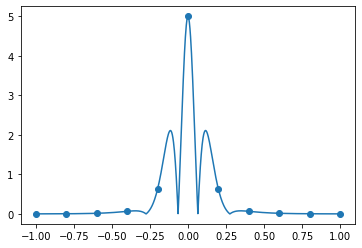

In [49]:
lff = lambdify(x, upper_bound_spline_func)
plt.plot(np.linspace(-1, 1, num= 1000), lff(np.linspace(-1, 1, num= 1000)))

plt.scatter(np.linspace(-1, 1, num= 11, dtype= float), lff(np.linspace(-1, 1, num= 11, dtype= float)))
plt.show()

In [50]:
Newton_10_upper_bound = calculate_upper_bound_evenly(upper_bound_Newton_func, 10)
Chebyshev_10_upper_bound = calculate_upper_bound_Chebyshev(upper_bound_Chebyshev_func, 10)
spline_11_upper_bound = calculate_upper_bound_evenly(upper_bound_spline_func, 11)

In [51]:
def get_error(df, name):
    return max(df[name])

print("Newton upper bound", Newton_10_upper_bound, "calculated error", get_error(df, 'Newton error'))
print("Chebyshev upper bound", Chebyshev_10_upper_bound, "calculated error", get_error(df, 'Chebyshev error'))
print("spline upper bound", spline_11_upper_bound, "calculated error", get_error(df, 'spline error'))

Newton upper bound 35531.112081420666 calculated error 0.30000946781067706
Chebyshev upper bound 329235.45329028164 calculated error 0.26915988954433123
spline upper bound 5.0 calculated error 0.019519738238400586


In [54]:
print("Newton upper bound MAX", get_max_function(upper_bound_Newton_func))
print("Chebyshev upper bound MAX", get_max_function(upper_bound_Chebyshev_func))
print("spline upper bound MAX", get_max_function(upper_bound_spline_func))

#TODO błąd jest dla calej funkcji a nie dla punktów



Newton upper bound MAX 824873.8282343753
Chebyshev upper bound MAX 5281341.51557502
spline upper bound MAX 4.99998124627132


# zadanie 3

In [139]:
def Lagrange_interpolation(f, n, a = -4, b = 4):
    points = np.linspace(a, b, n)

    lf = lambdify(x, f)
    inter = scinter.lagrange(points, lf(points))

    return inter

f = abs(sin(x))

n=10
inter = Lagrange_interpolation(f, n)

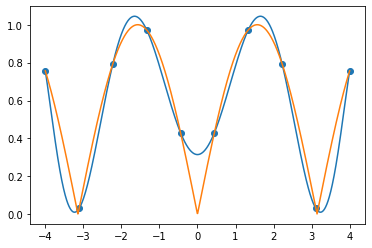

In [140]:
plot_interpolation(f, inter, np.linspace(-4, 4, n), -4, 4)

# zadanie 4

In [162]:
def monomial_interpolation_own(points):
    n = len(points)
    matrix = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            matrix[i][j] = points[i][0] ** j

    val = np.array([p[1]  for p in points])
    res = np.linalg.solve(matrix, val)

    pol = 0
    for i in range (len(res)):
        pol += res[i] * x ** i

    return poly(pol)

points = [(0.5, 5.5), (1, 14.5), (1.5, 32.5), (2,62.5)]

monomial_interpolation_own(points)

Poly(4.0*x**3 + 6.0*x**2 + 2.0*x + 2.5, x, domain='RR')

In [145]:
def Lagrange_interpolation_own(points):
    x_values, y_values = [p[0] for p in points], [p[1] for p in points]

    n = len(points)

    res = 0

    for i in range(n):
        y = y_values[i]
        tmp = 1
        for j in range(n):
            if i == j:
                continue
            tmp *= (x - x_values[j]) / (x_values[i] - x_values[j])

        y *= tmp
        res += y

    return poly(res)

# scinter.lagrange([p[0] for p in points], [p[1] for p in points])
Lagrange_interpolation_own(points)

Poly(3.99999999999999*x**3 + 6.00000000000003*x**2 + 2.0*x + 2.5, x, domain='RR')

In [143]:
def Newton_interpolation_own(points):
    x_values, y_values = [p[0] for p in points], [p[1] for p in points]

    n = len(points)
    matrix = np.zeros((n,n))

    for i in range(n):
        matrix[i][0] = y_values[i]

    for i in range(1,n):
        for j in range(i, n):
            matrix[j][i] = (matrix[j][i-1] - matrix[j-1][i-1]) / (x_values[j] - x_values[j - i])
    # print(matrix)
    newt = np.zeros(n)

    for i in range(n):
        newt[i] = matrix[i][i]

    res = newt[n-1]
    for i in range(n-2, -1, -1):
        res = res * (x - x_values[i]) + newt[i]

    return poly(res)




Newton_interpolation_own(points)

Poly(4.0*x**3 + 6.0*x**2 + 2.0*x + 2.5, x, domain='RR')

zadanie 5



In [169]:
p = poly(3*x**3 - 7*x**2 +5*x -4, domain = 'RR')
p

Poly(3.0*x**3 - 7.0*x**2 + 5.0*x - 4.0, x, domain='RR')

In [173]:
coefs = p.all_coeffs()

def Horners_method(coefs):
    res = coefs[0]
    for i in range(1, len(coefs)):
        res = res * x + coefs[i]
    return res
Horners_method(coefs)

x*(x*(3.0*x - 7.0) + 5.0) - 4.0